<a href="https://colab.research.google.com/github/ayushsawant464/Option-Pricing-Model/blob/main/Option_Pricing_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('Train.csv')



   Id OptionType  Strike        Spot  TimeToExpiry  RiskfreeRate  \
0   1        Put     120  148.558157      0.944954      2.720659   
1   2        Put      80  118.158570      1.723779      4.873176   
2   3       Call      90  108.090156      0.411624      5.082002   
3   4        Put      90  111.602240      1.951201      5.923971   
4   5        Put     150   56.343242      0.878590      3.307863   

   MarketFearIndex  BuySellRatio  OptionPrice  
0        71.285594      0.487120     2.877919  
1        64.524904      3.444798    11.626476  
2        76.619034      3.750903    27.088208  
3        95.871987      0.319245     4.629991  
4        46.758397      1.031902    90.974035  
Id                 0
OptionType         0
Strike             0
Spot               0
TimeToExpiry       0
RiskfreeRate       0
MarketFearIndex    0
BuySellRatio       0
OptionPrice        0
dtype: int64


Mean Absolute Error: 1.5284389573109092
Mean Squared Error: 5.170871924032392
R-squared: 0.9905517071224601


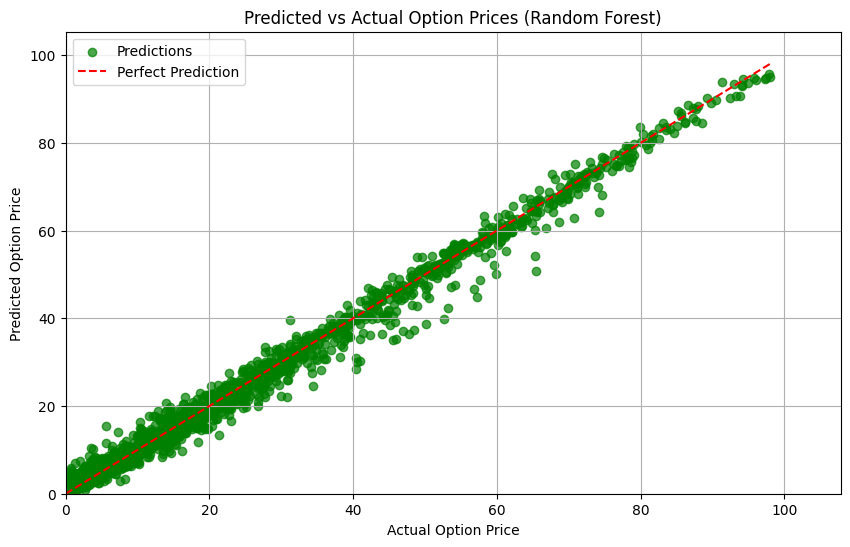

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

df = pd.read_csv('Train.csv')

df['OptionType'] = df['OptionType'].map({'Call': 1, 'Put': 0})

# Feature selection
X = df.drop(columns=['Id', 'OptionPrice'])
y = df['OptionPrice']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Calculating accuracy metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plotting the predicted vs actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.7, color='green', label='Predictions')
plt.plot([0, max(y_test)], [0, max(y_test)], '--', color='red', label='Perfect Prediction')  # Diagonal line
plt.title('Predicted vs Actual Option Prices (Random Forest)')
plt.xlabel('Actual Option Price')
plt.ylabel('Predicted Option Price')
plt.grid()
plt.xlim(0, max(y_test) * 1.1)
plt.ylim(0, max(predictions) * 1.1)
plt.legend()
plt.show()

In [ ]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df['OptionType'] = df['OptionType'].map({'Call': 1, 'Put': 0})

# Feature selection
X = df.drop(columns=['Id', 'OptionPrice'])
y = df['OptionPrice']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model as before
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save the trained model to a file
model_filename = 'random_forest_option_price_model.pkl'
joblib.dump(model, model_filename)

# print(f"Model saved as {model_filename}")


['random_forest_option_price_model.pkl']

In [ ]:

new_data_path = 'test.csv'
df1 = pd.read_csv(new_data_path)

df1['OptionType'] = df1['OptionType'].map({'Call': 1, 'Put': 0})


features = df1[['OptionType', 'Strike', 'Spot', 'RiskfreeRate', 'MarketFearIndex', 'BuySellRatio']]
predictions = model.predict(features)
output_df = pd.DataFrame({
    'Id': df['Id'],
    'OptionPrice': predictions
})
output_df['OptionPrice'] = output_df['OptionPrice'].clip(lower=0)
print("Id,OptionPrice")
for _, row in output_df.iterrows():
    print(f"{row['Id']},{row['OptionPrice']}")


NameError: name 'pd' is not defined